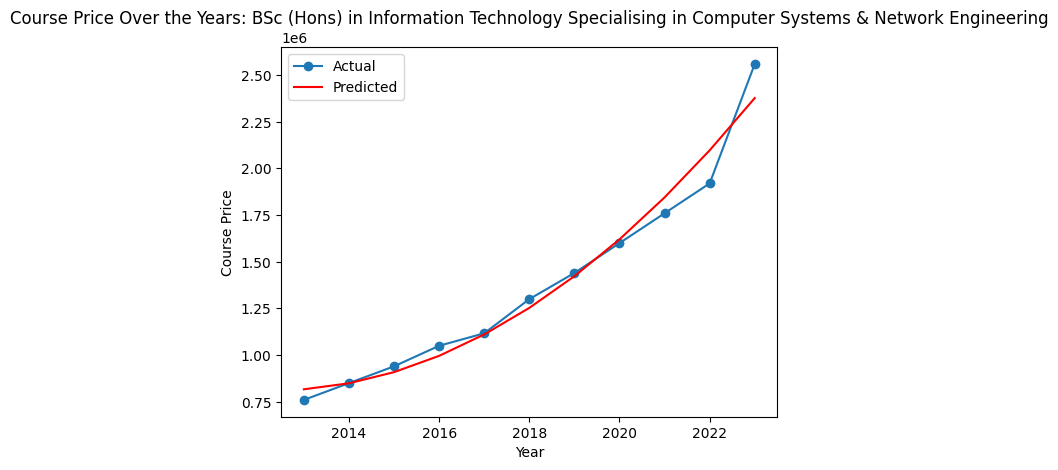

Predicted course price for BSc (Hons) in Information Technology Specialising in Computer Systems & Network Engineering in year  2026 : Rs.  3381952  (around)


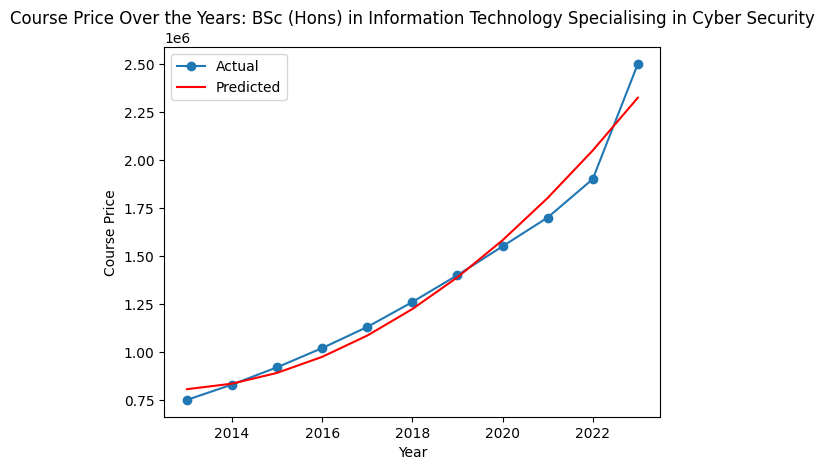

Predicted course price for BSc (Hons) in Information Technology Specialising in Cyber Security in year  2026 : Rs.  3312167  (around)


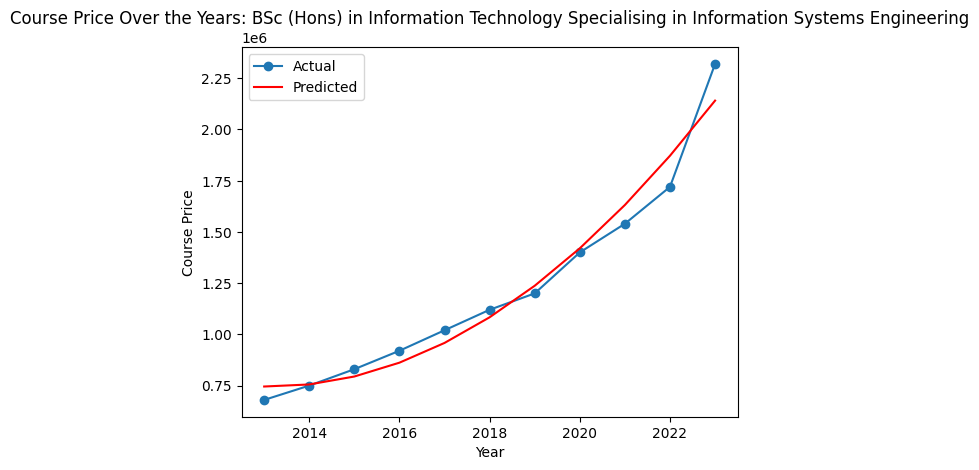

Predicted course price for BSc (Hons) in Information Technology Specialising in Information Systems Engineering in year  2026 : Rs.  3120909  (around)


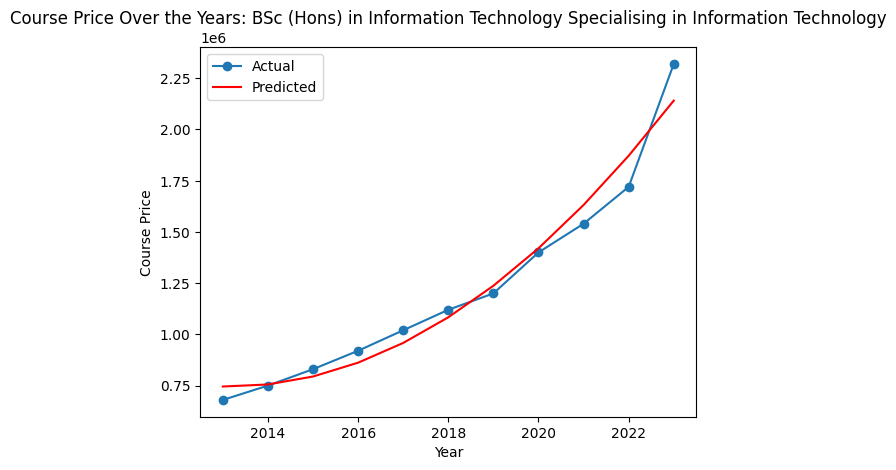

Predicted course price for BSc (Hons) in Information Technology Specialising in Information Technology in year  2026 : Rs.  3120909  (around)


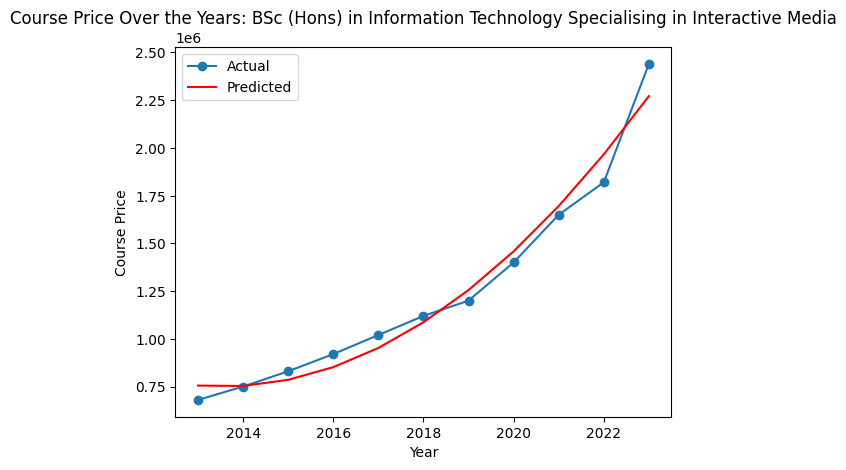

Predicted course price for BSc (Hons) in Information Technology Specialising in Interactive Media in year  2026 : Rs.  3391762  (around)


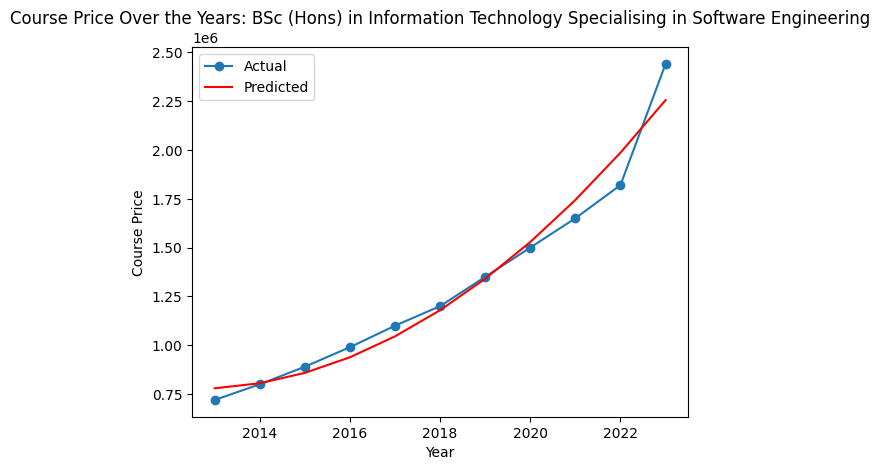

Predicted course price for BSc (Hons) in Information Technology Specialising in Software Engineering in year  2026 : Rs.  3224349  (around)


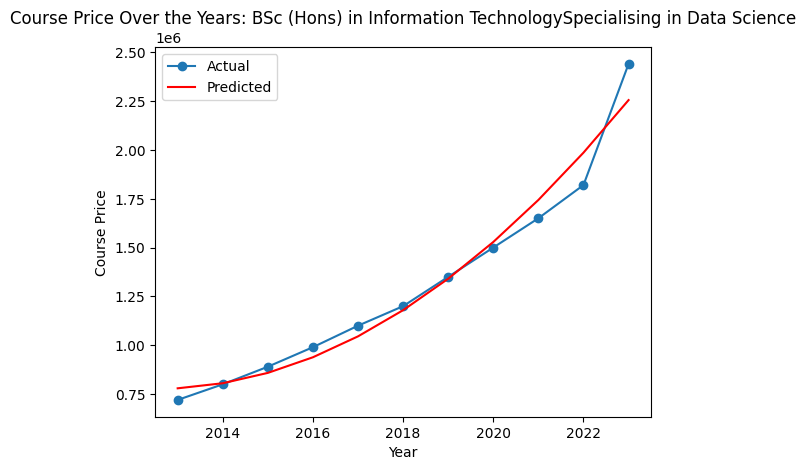

Predicted course price for BSc (Hons) in Information TechnologySpecialising in Data Science in year  2026 : Rs.  3224349  (around)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/SamithaPrabath/course-finder/master/course_price.csv')

# Group the data by course name and year and calculate the average course price for each combination
average_prices = data.groupby(['course_name', 'year'])['course_price'].mean().reset_index()

# Perform prediction for each course separately
for course_name in average_prices['course_name'].unique():
    # Filter the data for the specific course
    course_data = average_prices[average_prices['course_name'] == course_name]

    # Prepare the data for polynomial regression
    X = course_data['year'].values.reshape(-1, 1)
    y = course_data['course_price'].values.reshape(-1, 1)

    # Fit the polynomial regression model
    poly_features = PolynomialFeatures(degree=2)  # Adjust the degree as needed
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict the course price for the years in the dataset
    y_pred = model.predict(X_poly)

    # Create a line plot for the course
    plt.plot(X, y, marker='o', label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted')

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Course Price')
    plt.title('Course Price Over the Years: ' + course_name)

    # Display the plot with legend
    plt.legend()
    plt.show()

    # Predict the course price for the given year
    given_year = 2026
    X_predict = np.array([[given_year]])
    X_predict_poly = poly_features.transform(X_predict)
    predicted_price = model.predict(X_predict_poly)

    # Display the predicted course price
    print('Predicted course price for', course_name, 'in year ',given_year,': Rs. ', int(predicted_price[0][0]),' (around)')


In [33]:
import json

# function for save mappings to json file
def create_json_file(file_name, encoded_list, pure_list):
  mapping ={}
  for i in range(len(encoded_list)):
    if pure_list[i] not in mapping:
      try:
        mapping[pure_list[i]] = int(encoded_list[i])
      except:
        continue

  filename = file_name
  with open(filename, 'w') as file:
    json.dump(mapping, file)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/SamithaPrabath/course-finder/master/bank_data.csv'
data = pd.read_csv(url)

# Convert categorical variables to numeric using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['University_encoded', 'eligible_borrower_encoded', 'Contribution_of_borrower_encoded', 'Citizenship_encoded', 'Mortgage_Status_encoded', 'Status_encoded']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column.replace("_encoded", "")].astype(str))

# Drop rows with missing values
data = data.dropna()

# Split the data into features and target variables
X = data[['University_encoded', 'eligible_borrower_encoded', 'Borrowers_Monthly_Income', 'Contribution_of_borrower_encoded', 'Citizenship_encoded', 'Applied_Loan_Amount', 'Mortgage_Status_encoded']]
y = data[['Interst_Rate', 'Loan_Amount', 'Interest', 'Status_encoded']]

create_json_file('University_encoded.json', data['University_encoded'], list(data['University']))
create_json_file('eligible_borrower_encoded.json', data['eligible_borrower_encoded'], list(data['eligible_borrower']))
create_json_file('Contribution_of_borrower_encoded.json', data['Contribution_of_borrower_encoded'], list(data['Contribution_of_borrower']))
create_json_file('Citizenship_encoded.json', data['Contribution_of_borrower_encoded'], list(data['Citizenship']))
create_json_file('Mortgage_Status_encoded.json', data['Contribution_of_borrower_encoded'], list(data['Mortgage_Status']))
create_json_file('Status_encoded.json', data['Contribution_of_borrower_encoded'], list(data['Status']))

# Encode the 'Status' column
y['Status'] = label_encoder.fit_transform(y['Status_encoded'].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate models for each target variable
models = {}
for column in y_train.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[column])
    models[column] = model

# Make predictions on the test set
y_pred = {}
for column, model in models.items():
    y_pred[column] = model.predict(X_test)

# Convert the 'Status' predictions back to original labels
y_pred['Status'] = label_encoder.inverse_transform(np.round(y_pred['Status']).astype(int))

# Print the predictions
print("Predicted values for Interst_Rate, Loan_Amount, Interest, and Status:")
for column, pred in y_pred.items():
    if column == 'Interst_Rate' or column == 'Status':
        if column == 'Status':
          i=0
          for p in pred:
            if p == '0':
              pred[i] = 'Approved'
            else:
              pred[i] = 'Declined'
            i = i+1
        print(f"{column}: {pred}")
    else:
        rounded_pred = np.round(pred, 2)
        print(f"{column}: {rounded_pred}")



<ipython-input-34-0997d800e651>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Status'] = label_encoder.fit_transform(y['Status_encoded'].astype(str))


Predicted values for Interst_Rate, Loan_Amount, Interest, and Status:
Interst_Rate: [0.1375 0.14   0.1375 0.1375 0.1375 0.14   0.1375 0.1375 0.14   0.1375
 0.14   0.1375 0.14   0.14   0.14   0.14   0.14   0.1375 0.14   0.1375
 0.1375 0.14   0.1375 0.14   0.14   0.14   0.14   0.1375 0.14   0.14
 0.14   0.14   0.1375 0.1375 0.14   0.14   0.1375 0.1375 0.1375 0.14
 0.1375 0.1375 0.1375 0.14   0.1375 0.1375 0.14   0.1375 0.1375 0.14
 0.1375 0.14   0.1375 0.14   0.1375 0.14   0.14   0.1375 0.14   0.14
 0.1375 0.1375 0.14   0.14   0.1375 0.1375 0.1375 0.14   0.14   0.1375
 0.1375 0.14   0.14   0.14   0.1375 0.1375 0.14   0.14   0.14   0.14
 0.14   0.1375 0.14   0.14   0.14   0.14   0.14   0.1375 0.14   0.1375
 0.14   0.14   0.14   0.1375 0.1375 0.14   0.1375 0.1375 0.14   0.14  ]
Loan_Amount: [      0.  135000.  800000.  850000. 1000000.  800000.  900000.  117000.
  150000.       0. 2000000.       0.  650000.  900000.  800000.  350000.
  201500.  202500.  750000.       0.  800000.  350000.  

In [35]:
# function for read json file and mapping
def map_jason(file_name, value):
  with open(file_name, 'r') as file:
    data_read = json.load(file)
    for key in data_read:
      if key == value:
        return data_read[key]

In [36]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Example usage: Predict the course duration for new inputs
data = {
    'University': ['NSBM'],
    'eligible_borrower': ['Yes '],
    'Borrowers_Monthly_Income': [1000],
    'Contribution_of_borrower': ['Yes'],
    'Citizenship': ['Yes '],
    'Applied_Loan_Amount': [700000],
    'Mortgage_Status': ['No'],

}
data = pd.DataFrame(data)
label_encoder = LabelEncoder()

data['University_encoded'] = map_jason('University_encoded.json', data['University'][0])
data['eligible_borrower_encoded'] = map_jason('eligible_borrower_encoded.json', data['eligible_borrower'][0])
data['Contribution_of_borrower_encoded'] =  map_jason('Contribution_of_borrower_encoded.json', data['Contribution_of_borrower'][0])
data['Citizenship_encoded'] = map_jason('Citizenship_encoded.json', data['Citizenship'][0])
data['Mortgage_Status_encoded'] = map_jason('Mortgage_Status_encoded.json', data['Mortgage_Status'][0])
data['Borrowers_Monthly_Income_encoded'] = label_encoder.fit_transform(data['Borrowers_Monthly_Income'])
data['Applied_Loan_Amount_encoded'] = label_encoder.fit_transform(data['Applied_Loan_Amount'])

X_test = data[['University_encoded', 'eligible_borrower_encoded', 'Borrowers_Monthly_Income', 'Contribution_of_borrower_encoded', 'Citizenship_encoded', 'Applied_Loan_Amount', 'Mortgage_Status_encoded']]

for column, model in models.items():
    y_pred[column] = model.predict(X_test)

output = ''
# Print the predictions
print("Predicted values for Interst_Rate, Loan_Amount, Interest, and Status:")

for column, pred in y_pred.items():
    if column == 'Interst_Rate' or column == 'Status':
        if column == 'Status':
          for p in pred:
            if p == '1':
              output = output + f" {column}: Declined"
              continue
            else:
              output = output + f" {column}: Approved"
              continue
        else:
          output = output + f" {column}: {pred}"
    else:
        rounded_pred = np.round(pred, 2)
        output = output + f" {column}: {rounded_pred}"

print(output)

Predicted values for Interst_Rate, Loan_Amount, Interest, and Status:
 Interst_Rate: [0.14] Loan_Amount: [660000.] Interest: [8050.] Status_encoded: [0.51] Status: Approved
